# MSH Tanzania PAD Summary of reads by TFDA and SB.xlsx - Tanzania Reads

# 1. Introduction<a id="introduction"></a>

# 2. Import padanalytics functions

In [3]:
# Import padanalytics functions
import os, sys
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Add parent directory to path to import local modules
sys.path.insert(0, os.path.abspath('../pad-ml-workflow-v2'))
sys.path.insert(0, os.path.abspath('../pad-ml-workflow-v2/src'))
# Import padanalytics functions
from src.padanalytics import *


# Load and Refactor MSH Tanzania Reads CSV <a id="select-project"></a>

In [4]:
import pandas as pd
import csv
import os

def extract_analyst21_data(input_filepath, output_filepath=None):
    """
    Extract data for Analyst 21 from the Tanzania Reads CSV file and save to a new CSV file.

    Parameters:
    -----------
    input_filepath : str
        Path to the original Tanzania Reads CSV file
    output_filepath : str, optional
        Path where the extracted data should be saved. If None, returns the DataFrame instead

    Returns:
    --------
    pandas.DataFrame or None
        If output_filepath is None, returns the extracted DataFrame; otherwise returns None
    """
    try:
        # Read the CSV file
        df = pd.read_csv(input_filepath)

        # Define column mapping for Analyst 21
        column_mapping = {
            'Analyst 21': 'Analyst',
            'Sample ID': 'Sample ID',
            'Labelled As': 'Labelled As',
            'Actual Identity': 'Actual Identity',
            'Identified As': 'Identified As',
            'Suspicious Because of Lanes…': 'Suspicious Because of Lanes',
            'Starch Present?': 'Starch Present?',
            'PAD #': 'PAD #',
            'Date Analyzed': 'Date Analyzed',
            'Comments': 'Comments'
        }

        # Select the columns for Analyst 21
        columns_to_extract = list(column_mapping.keys())

        # Extract only the relevant columns
        df_analyst21 = df[columns_to_extract].copy()

        # Rename the columns for clarity
        df_analyst21.rename(columns=column_mapping, inplace=True)

        # Filter out rows where all values are empty or NaN
        df_analyst21 = df_analyst21.dropna(how='all')

        # If output path is provided, save to CSV
        if output_filepath:
            df_analyst21.to_csv(output_filepath, index=False)
            print(f"Data successfully exported to {output_filepath}")
            return None

        # Otherwise return the DataFrame
        return df_analyst21

    except Exception as e:
        print(f"Error extracting data: {str(e)}")
        return None

def split_tanzania_reads_by_analyst(input_filepath, output_dir):
    """
    Split the Tanzania Reads CSV file into separate files for each analyst.

    Parameters:
    -----------
    input_filepath : str
        Path to the original Tanzania Reads CSV file
    output_dir : str
        Directory where the split files will be saved
    """
    try:
        # Create output directory if it doesn't exist
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        # Read the CSV file
        df = pd.read_csv(input_filepath)

        # Process each analyst from 21 to 40
        for analyst_num in range(21, 41):
            # Define column mappings for current analyst
            suffix = '' if analyst_num == 21 else f'.{analyst_num - 21}'

            column_mapping = {
                f'Analyst {analyst_num}': 'Analyst',
                f'Sample ID{suffix}': 'Sample ID',
                f'Labelled As{suffix}': 'Labelled As',
                f'Actual Identity{suffix}': 'Actual Identity',
                f'Identified As{suffix}': 'Identified As',
                f'Suspicious Because of Lanes…{suffix}': 'Suspicious Because of Lanes',
                f'Starch Present?{suffix}': 'Starch Present?',
                f'PAD #{suffix}': 'PAD #',
                f'Date Analyzed{suffix}': 'Date Analyzed',
                f'Comments{suffix}': 'Comments'
            }

            # Select columns for this analyst
            try:
                columns_to_extract = list(column_mapping.keys())
                df_analyst = df[columns_to_extract].copy()

                # Rename columns
                df_analyst.rename(columns=column_mapping, inplace=True)

                # Filter out rows where all values are empty or NaN
                df_analyst = df_analyst.dropna(how='all')

                # Only create files for analysts that have data
                if not df_analyst.empty:
                    output_filepath = os.path.join(output_dir, f'Analyst_{analyst_num}_Tanzania.csv')
                    df_analyst.to_csv(output_filepath, index=False)
                    print(f"Created {output_filepath} with {len(df_analyst)} rows")
            except KeyError as e:
                print(f"Skipping Analyst {analyst_num} due to missing columns: {e}")

        print("Split complete!")

    except Exception as e:
        print(f"Error splitting file: {str(e)}")

def analyze_tanzania_drug_data(df):
    """
    Analyze the drug testing data to provide insights.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the analyst's drug testing data

    Returns:
    --------
    dict
        Dictionary containing analysis results
    """
    analysis = {}

    # Count of each type in Labelled As
    analysis['labelled_as_counts'] = df['Labelled As'].value_counts().to_dict()

    # Count of each type in Actual Identity
    analysis['actual_identity_counts'] = df['Actual Identity'].value_counts().to_dict()

    # Count of each type in Identified As
    analysis['identified_as_counts'] = df['Identified As'].value_counts().to_dict()

    # Check agreement between Labelled As and Actual Identity
    df['agreement'] = df['Labelled As'] == df['Actual Identity']
    agreement_count = df['agreement'].sum()
    total_valid_count = df[['Labelled As', 'Actual Identity']].notna().all(axis=1).sum()

    analysis['agreement_count'] = agreement_count
    analysis['disagreement_count'] = total_valid_count - agreement_count
    analysis['agreement_percentage'] = (agreement_count / total_valid_count * 100) if total_valid_count > 0 else 0

    return analysis

# Example usage:
if __name__ == "__main__":
    # Replace with actual file paths
    input_file = "../data/MSHTanzaniaReads.csv"
    output_dir = "../data/MSHTanzaniaReads_files/"

    # Extract just Analyst 21 data
    #analyst21_df = extract_analyst21_data(input_file, "Analyst_21_Tanzania.csv")

    # Or split the file for all analysts
    split_tanzania_reads_by_analyst(input_file, output_dir)

Created ../data/MSHTanzaniaReads_files/Analyst_21_Tanzania.csv with 152 rows
Created ../data/MSHTanzaniaReads_files/Analyst_22_Tanzania.csv with 152 rows
Created ../data/MSHTanzaniaReads_files/Analyst_23_Tanzania.csv with 152 rows
Created ../data/MSHTanzaniaReads_files/Analyst_24_Tanzania.csv with 152 rows
Created ../data/MSHTanzaniaReads_files/Analyst_25_Tanzania.csv with 152 rows
Created ../data/MSHTanzaniaReads_files/Analyst_26_Tanzania.csv with 152 rows
Created ../data/MSHTanzaniaReads_files/Analyst_27_Tanzania.csv with 152 rows
Created ../data/MSHTanzaniaReads_files/Analyst_28_Tanzania.csv with 152 rows
Created ../data/MSHTanzaniaReads_files/Analyst_29_Tanzania.csv with 152 rows
Created ../data/MSHTanzaniaReads_files/Analyst_30_Tanzania.csv with 152 rows
Created ../data/MSHTanzaniaReads_files/Analyst_31_Tanzania.csv with 152 rows
Created ../data/MSHTanzaniaReads_files/Analyst_32_Tanzania.csv with 152 rows
Created ../data/MSHTanzaniaReads_files/Analyst_33_Tanzania.csv with 152 rows

In [5]:
# prompt: read all /content/Analyst_*_Tanzania.csv concatenate as dataframe and creat  a column that has the Analyst id

import pandas as pd
import glob

def standardize_names(name):
    return name.strip().lower().replace(' ', '-')

def concatenate_analyst_files(directory):
  """
  Reads all CSV files matching the pattern 'Analyst_*_Tanzania.csv' in the specified directory,
  concatenates them into a single DataFrame, and adds an 'Analyst_ID' column.

  Args:
      directory: The directory containing the CSV files.

  Returns:
      A pandas DataFrame containing the concatenated data, or None if no matching files are found.
  """
  all_files = glob.glob(os.path.join(directory, "Analyst_*_Tanzania.csv"))

  if not all_files:
    print("No matching CSV files found in the directory.")
    return None

  df_list = []
  for filename in all_files:
    try:
      df = pd.read_csv(filename)
      analyst_id = os.path.basename(filename).split('_')[1]  # Extract Analyst ID from filename
      df['analyst_id'] = analyst_id
      df_list.append(df)
    except pd.errors.EmptyDataError:
        print(f"Skipping empty file: {filename}")
    except Exception as e:
        print(f"Error reading file {filename}: {e}")

  if not df_list:
    print("No valid CSV files found to concatenate.")
    return None

  concatenated_df = pd.concat(df_list, ignore_index=True)

  # move analyst_id to the second column
  cols = list(concatenated_df.columns)
  cols.insert(1, cols.pop(cols.index('analyst_id')))
  concatenated_df = concatenated_df.loc[:, cols]

  # remove rowns with Analyst NaN
  concatenated_df = concatenated_df.dropna(subset=['Analyst'])

  #
  concatenated_df['PAD #'] = concatenated_df['PAD #'].fillna(-1).astype(np.int64)

  # Replace '\xa0' with '' in the 'Sample ID' column
  concatenated_df['Sample ID'] = concatenated_df['Sample ID'].str.replace('\xa0', '')

  # convert the columns to str
  concatenated_df['Labelled As'] = concatenated_df['Labelled As'].astype(str)
  concatenated_df['Actual Identity'] = concatenated_df['Actual Identity'].astype(str)
  concatenated_df['Identified As'] = concatenated_df['Identified As'].astype(str)

  # apply standardize_names to the columns 'Labelled As'	'Actual Identity'	'Identified As'
  concatenated_df['Labelled As'] = concatenated_df['Labelled As'].apply(standardize_names)
  concatenated_df['Actual Identity'] = concatenated_df['Actual Identity'].apply(standardize_names)
  concatenated_df['Identified As'] = concatenated_df['Identified As'].apply(standardize_names)


  return concatenated_df

# Example usage:
directory_path = output_dir # Replace with your directory
MSHTanzaniaReads = concatenate_analyst_files(directory_path)
MSHTanzaniaReads



,Analyst,analyst_id,Sample ID,Labelled As,Actual Identity,Identified As,Suspicious Because of Lanes,Starch Present?,PAD #,Date Analyzed,Comments
0,1.0,28,T28-6I29,amoxicillin,amoxicillin,amoxicillin,NaN,NaN,35197,7/9/2018,NaN
1,2.0,28,T28-KYE2,amoxicillin,amoxicillin,amoxicillin,NaN,NaN,35266,7/9/2018,NaN
2,3.0,28,T28-NNJQ,amoxicillin,amoxicillin,amoxicillin,NaN,NaN,35267,7/9/2018,NaN
3,4.0,28,T28-DUWC,amoxicillin,amoxicillin,amoxicillin,NaN,NaN,35196,7/9/2018,NaN
4,5.0,28,T28-SU2V,amoxicillin,amoxicillin,amoxicillin,NaN,NaN,35272,7/9/2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3033,146.0,38,T38-4CRK,quinine,vitamin-c,suspicious,D,NaN,30309,25/9/2018,NaN
3034,147.0,38,T38-TGRV,quinine,vitamin-c,suspicious,D,NaN,35486,15/8/2018,Probably ascorbic acid
3035,148.0,38,T38-6P2X,quinine,vitamin-c,suspicious,D,NaN,34564,4/9/2018,NaN
3036,149.0,38,T38-GOU4,quinine,vitamin-c,suspicious,D,NaN,34569,4/9/2018,NaN


#4. Get cards from Tanzania project (id=19)<a id="select-project-19"></a>

In [6]:
project_19_data = get_project_cards(project_ids=19)
project_19_data['sample_id'] = project_19_data['sample_id'].fillna(-1).astype(np.int64)
project_19_data

,id,sample_name,test_name,user_name,date_of_creation,raw_file_location,processed_file_location,processing_date,camera_type_1,notes,...,project.project_name,project.annotation,project.test_name,project.sample_names.sample_names,project.neutral_filler,project.qpc20,project.qpc50,project.qpc80,project.qpc100,project.notes
0,9452,Vitamin C,12LanePADKenya2015,Analyst 39,2018-11-29T19:06:58,/var/www/html/images/padimages/raw/0/9452_raw.jpg,/var/www/html/images/padimages/processed/0/945...,2018-11-29T19:06:58,unknown,"Basket 2 PAD Photos, T39-NTUD",...,MSH Tanzania,None,12LanePADKenya2015,"[Amoxicillin, Benzyl Penicillin, Calcium Carbo...",,0,0,0,1,
1,9453,Paracetamol,12LanePADKenya2015,Analyst 39,2018-11-29T19:07:03,/var/www/html/images/padimages/raw/0/9453_raw.jpg,/var/www/html/images/padimages/processed/0/945...,2018-11-29T19:07:03,unknown,"Basket 2 PAD Photos, T39-5C9D",...,MSH Tanzania,None,12LanePADKenya2015,"[Amoxicillin, Benzyl Penicillin, Calcium Carbo...",,0,0,0,1,
2,9454,Starch,12LanePADKenya2015,Analyst 39,2018-11-29T19:07:08,/var/www/html/images/padimages/raw/0/9454_raw.jpg,/var/www/html/images/padimages/processed/0/945...,2018-12-01T22:47:15,unknown,"Basket 2 PAD Photos, T39-QH5E",...,MSH Tanzania,None,12LanePADKenya2015,"[Amoxicillin, Benzyl Penicillin, Calcium Carbo...",,0,0,0,1,
3,9455,Lactose,12LanePADKenya2015,Analyst 39,2018-11-29T19:07:14,/var/www/html/images/padimages/raw/0/9455_raw.jpg,/var/www/html/images/padimages/processed/0/945...,2018-11-29T19:07:14,unknown,"Basket 2 PAD Photos, T39-R1NW",...,MSH Tanzania,None,12LanePADKenya2015,"[Amoxicillin, Benzyl Penicillin, Calcium Carbo...",,0,0,0,1,
4,9456,Cellulose,12LanePADKenya2015,Analyst 39,2018-11-29T19:07:19,/var/www/html/images/padimages/raw/0/9456_raw.jpg,/var/www/html/images/padimages/processed/0/945...,2018-12-02T17:16:37,unknown,"Basket 2 PAD Photos, T39-13E1",...,MSH Tanzania,None,12LanePADKenya2015,"[Amoxicillin, Benzyl Penicillin, Calcium Carbo...",,0,0,0,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,14153,Unknown,12LanePADKenya2015,api-OUDPXFH17PEGKUW3FM4Z,2019-03-12T09:59:30,/var/www/html/joomla/images/padimages/raw/Unkn...,/var/www/html/joomla/images/padimages/processe...,2019-03-12T09:59:30,BLU BLU R1 HD,cefixime 37508,...,MSH Tanzania,None,12LanePADKenya2015,"[Amoxicillin, Benzyl Penicillin, Calcium Carbo...",,0,0,0,1,
3200,14154,Unknown,12LanePADKenya2015,api-OUDPXFH17PEGKUW3FM4Z,2019-03-12T10:05:36,/var/www/html/joomla/images/padimages/raw/Unkn...,/var/www/html/joomla/images/padimages/processe...,2019-03-12T10:05:36,BLU BLU R1 HD,cefixime 37857,...,MSH Tanzania,None,12LanePADKenya2015,"[Amoxicillin, Benzyl Penicillin, Calcium Carbo...",,0,0,0,1,
3201,14155,Unknown,12LanePADKenya2015,api-OUDPXFH17PEGKUW3FM4Z,2019-03-12T10:15:01,/var/www/html/joomla/images/padimages/raw/Unkn...,/var/www/html/joomla/images/padimages/processe...,2019-03-12T10:15:01,BLU BLU R1 HD,cefixime 37512,...,MSH Tanzania,None,12LanePADKenya2015,"[Amoxicillin, Benzyl Penicillin, Calcium Carbo...",,0,0,0,1,
3202,14156,Unknown,12LanePADKenya2015,api-OUDPXFH17PEGKUW3FM4Z,2019-03-12T10:21:19,/var/www/html/joomla/images/padimages/raw/Unkn...,/var/www/html/joomla/images/padimages/processe...,2019-03-12T10:21:19,BLU BLU R1 HD,cefixime 37511,...,MSH Tanzania,None,12LanePADKenya2015,"[Amoxicillin, Benzyl Penicillin, Calcium Carbo...",,0,0,0,1,


#5. Combine Dataframes<a id="combine"></a>

In [7]:
import pandas as pd

# Convert columns to strings for reliable comparisons
project_19_data['sample_id'] = project_19_data['sample_id'].astype(str)
MSHTanzaniaReads['PAD #'] = MSHTanzaniaReads['PAD #'].astype(str)

# Determine which column to use from concatenated_df for the substring condition.
sample_id_col = "Sample ID"

def get_matching_id(row):
    # Get the PAD # value (as string)
    pad_val = row['PAD #']
    # Get the sample id to search for in the notes (also as string)
    search_val = str(row[sample_id_col])

    # Filter rows in project_19_data that match the PAD # condition
    candidates = project_19_data[project_19_data['sample_id'] == pad_val]

    if candidates.empty:
        return None  # No matching sample_id found in project_19_data

    # Check each candidate's notes to see if they contain the search_val
    for _, proj_row in candidates.iterrows():
        # Convert notes to string for a substring search
        notes = str(proj_row['notes'])
        # print(search_val, notes, proj_row)
        if search_val in notes:
            # display(proj_row)
            return proj_row['id']


    return None  # No candidate met the substring condition

# Apply the function to each row in concatenated_df to create the new 'id' column of the dtype int64
MSHTanzaniaReads['id'] = MSHTanzaniaReads.apply(get_matching_id, axis=1)
# make 'id' column of the dtype int64
MSHTanzaniaReads['id'] = MSHTanzaniaReads['id'].fillna(-1).astype(np.int64)
# reposition 'id' column to the first colunm
cols = list(MSHTanzaniaReads.columns)
cols.insert(0, cols.pop(cols.index('id')))
MSHTanzaniaReads = MSHTanzaniaReads.loc[:, cols]

MSHTanzaniaReads



,id,Analyst,analyst_id,Sample ID,Labelled As,Actual Identity,Identified As,Suspicious Because of Lanes,Starch Present?,PAD #,Date Analyzed,Comments
0,12309,1.0,28,T28-6I29,amoxicillin,amoxicillin,amoxicillin,NaN,NaN,35197,7/9/2018,NaN
1,12256,2.0,28,T28-KYE2,amoxicillin,amoxicillin,amoxicillin,NaN,NaN,35266,7/9/2018,NaN
2,12275,3.0,28,T28-NNJQ,amoxicillin,amoxicillin,amoxicillin,NaN,NaN,35267,7/9/2018,NaN
3,12243,4.0,28,T28-DUWC,amoxicillin,amoxicillin,amoxicillin,NaN,NaN,35196,7/9/2018,NaN
4,12333,5.0,28,T28-SU2V,amoxicillin,amoxicillin,amoxicillin,NaN,NaN,35272,7/9/2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3033,10352,146.0,38,T38-4CRK,quinine,vitamin-c,suspicious,D,NaN,30309,25/9/2018,NaN
3034,10365,147.0,38,T38-TGRV,quinine,vitamin-c,suspicious,D,NaN,35486,15/8/2018,Probably ascorbic acid
3035,10284,148.0,38,T38-6P2X,quinine,vitamin-c,suspicious,D,NaN,34564,4/9/2018,NaN
3036,10277,149.0,38,T38-GOU4,quinine,vitamin-c,suspicious,D,NaN,34569,4/9/2018,NaN


### Fix some typos in the field 'Identified As'

In [8]:
MSHTanzaniaReads['Labelled As'].unique()

array(['amoxicillin', 'paracetamol', 'benzyl-penicillin',
       'penicillin-procaine', 'quinine'], dtype=object)

In [9]:
print(MSHTanzaniaReads['Identified As'].unique())

['amoxicillin' 'suspicious' 'paracetamol' 'paracetamol-starch'
 'benzyl-penicillin' 'penicillin-procaine' 'quinine' 'nan'
 'pencillin-procaine' 'penicllin-procaine' 'benzyl-penicllin'
 'benzyl-pencillin']


#6. Load Test dataset<a id="combine"></a>

In [10]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
test_df = pd.read_csv('../data/metadata_test.csv')

# Now you can work with the dataframe named 'metadata_df'
test_df.head()

,id,sample_id,sample_name,quantity,project.id,url,hashlib_md5,image_name
0,12718,30078,amoxicillin,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,9408216a521af5428d32fbf1a4aa5c3a,12718__30078__amoxicillin__100.png
1,12702,31738,amoxicillin,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,0dd539ffbfe20678c1f9b6dbc6c236bc,12702__31738__amoxicillin__100.png
2,12661,35862,amoxicillin,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,f1340a0574aad9a76fad044bc62ec88b,12661__35862__amoxicillin__100.png
3,12605,29771,amoxicillin,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,cf67b8b61d54a62497b91ca1caf68929,12605__29771__amoxicillin__100.png
4,12469,31779,amoxicillin,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,b0b4d9e945319659c26ae398e71922f8,12469__31779__amoxicillin__100.png


Load Predictions

In [11]:
predictions = pd.read_csv('../data/predictions_mshtv1.csv')
predictions

,image_name,expected_label,predicted_label,confidence
0,12718__30078__amoxicillin__100.png,amoxicillin,amoxicillin,0.999966
1,12702__31738__amoxicillin__100.png,amoxicillin,amoxicillin,0.994325
2,12661__35862__amoxicillin__100.png,amoxicillin,amoxicillin,0.999896
3,12605__29771__amoxicillin__100.png,amoxicillin,amoxicillin,0.999987
4,12469__31779__amoxicillin__100.png,amoxicillin,amoxicillin,0.999923
...,...,...,...,...
585,9551__30790__vitamin-c__100.png,vitamin-c,vitamin-c,0.999790
586,9535__30777__vitamin-c__100.png,vitamin-c,vitamin-c,0.999806
587,9488__33879__vitamin-c__100.png,vitamin-c,vitamin-c,0.999681
588,9476__33877__vitamin-c__100.png,vitamin-c,vitamin-c,0.999738


Union of test_df and predictions

In [12]:
test_df = pd.merge(test_df, predictions, on='image_name', how='outer')
test_df


,id,sample_id,sample_name,quantity,project.id,url,hashlib_md5,image_name,expected_label,predicted_label,confidence
0,10017,31998,amoxicillin,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,0d9ae782f983962a96dfb84775828170,10017__31998__amoxicillin__100.png,amoxicillin,amoxicillin,0.998246
1,10022,32000,quinine,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,22a415afd00b4eb7ff168ccdb7705593,10022__32000__quinine__100.png,quinine,quinine,0.999141
2,10026,32014,benzyl-penicillin,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,ab7d468f1964b24ef6540b30b6401c17,10026__32014__benzyl-penicillin__100.png,benzyl-penicillin,benzyl-penicillin,0.999840
3,10028,33672,vitamin-c,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,f5c2061895aab2063abcefb40fca7157,10028__33672__vitamin-c__100.png,vitamin-c,vitamin-c,0.998223
4,10031,33659,vitamin-c,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,c7d5c32d5181486d5f97e7a1cc6c6b7c,10031__33659__vitamin-c__100.png,vitamin-c,vitamin-c,0.999597
...,...,...,...,...,...,...,...,...,...,...,...
585,9979,33856,penicillin-procaine,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,1e3e13be626d3d366e5a01ee9ec21b22,9979__33856__penicillin-procaine__100.png,penicillin-procaine,penicillin-procaine,0.996328
586,9984,33859,lactose,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,0905906aa6a951d8fbc9d577738f1b96,9984__33859__lactose__100.png,lactose,lactose,0.997820
587,9988,32033,starch,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,28aed7923b013fdc4f9966e84060e0ce,9988__32033__starch__100.png,starch,starch,0.986442
588,9993,33661,vitamin-c,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,d758211ac9c62c6f05e4bcb4885b7622,9993__33661__vitamin-c__100.png,vitamin-c,vitamin-c,0.998239


#7. Merging data

In [13]:
# Merge the dataframes based on the 'id' column
test_set_with_msh = pd.merge(test_df, MSHTanzaniaReads, on='id', how='left')

# Now test_df has been updated with values from concatenated_df.
test_set_with_msh





# # Iterate over the rows of test_df_copy
# for index, row in test_df_copy.iterrows():
#   # Find the corresponding row in concatenated_df
#   matching_row = MSHTanzaniaReads[MSHTanzaniaReads['id'] == row['id']]

#   # Check if a match was found
#   if not matching_row.empty:
#     # Replace values in test_df_copy with values from concatenated_df
#     for col in matching_row.columns: #iterate through all columns in concatenated_df
#       if col != 'id': # avoid overwriting the 'id' column
#         test_df_copy.loc[index, col] = matching_row[col].iloc[0]



# # Print or further process test_df_copy as needed
# test_df_copy


,id,sample_id,sample_name,quantity,project.id,url,hashlib_md5,image_name,expected_label,predicted_label,...,analyst_id,Sample ID,Labelled As,Actual Identity,Identified As,Suspicious Because of Lanes,Starch Present?,PAD #,Date Analyzed,Comments
0,10017,31998,amoxicillin,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,0d9ae782f983962a96dfb84775828170,10017__31998__amoxicillin__100.png,amoxicillin,amoxicillin,...,36,T36-WIO9,amoxicillin,amoxicillin,suspicious,NaN,NaN,31998,22/9/2018,NaN
1,10022,32000,quinine,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,22a415afd00b4eb7ff168ccdb7705593,10022__32000__quinine__100.png,quinine,quinine,...,36,T36-TCZA,quinine,quinine,quinine,NaN,NaN,32000,22/9/2018,NaN
2,10026,32014,benzyl-penicillin,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,ab7d468f1964b24ef6540b30b6401c17,10026__32014__benzyl-penicillin__100.png,benzyl-penicillin,benzyl-penicillin,...,36,T36-RW5K,benzyl-penicillin,benzyl-penicillin,benzyl-penicillin,NaN,NaN,32014,22/9/2018,NaN
3,10028,33672,vitamin-c,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,f5c2061895aab2063abcefb40fca7157,10028__33672__vitamin-c__100.png,vitamin-c,vitamin-c,...,36,T36-M344,benzyl-penicillin,vitamin-c,suspicious,F,NaN,33672,23/9/2018,NaN
4,10031,33659,vitamin-c,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,c7d5c32d5181486d5f97e7a1cc6c6b7c,10031__33659__vitamin-c__100.png,vitamin-c,vitamin-c,...,36,T36-ZQA5,benzyl-penicillin,vitamin-c,suspicious,F,NaN,33659,23/9/2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,9979,33856,penicillin-procaine,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,1e3e13be626d3d366e5a01ee9ec21b22,9979__33856__penicillin-procaine__100.png,penicillin-procaine,penicillin-procaine,...,36,T36-OH59,penicillin-procaine,penicillin-procaine,penicillin-procaine,NaN,NaN,33856,4/9/2018,NaN
586,9984,33859,lactose,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,0905906aa6a951d8fbc9d577738f1b96,9984__33859__lactose__100.png,lactose,lactose,...,36,T36-JE1E,amoxicillin,lactose,suspicious,B,NaN,33859,4/9/2018,NaN
587,9988,32033,starch,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,28aed7923b013fdc4f9966e84060e0ce,9988__32033__starch__100.png,starch,starch,...,36,T36-JTXP,quinine,starch,suspicious,D,Yes,32033,20/9/2018,NaN
588,9993,33661,vitamin-c,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,d758211ac9c62c6f05e4bcb4885b7622,9993__33661__vitamin-c__100.png,vitamin-c,vitamin-c,...,36,T36-P8N4,penicillin-procaine,vitamin-c,suspicious,D,NaN,33661,23/9/2018,NaN


#8. Define Good/bad samples

In [14]:
# Add the 'is_good_sample' column to test_df_copy
test_set_with_msh['is_good_sample'] = test_set_with_msh['Labelled As'] == test_set_with_msh['Actual Identity']

# reposition 'id' column to the first colunm
cols = list(test_set_with_msh.columns)
cols.insert(0, cols.pop(cols.index('is_good_sample')))
test_set_with_msh = test_set_with_msh.loc[:, cols]

test_set_with_msh

,is_good_sample,id,sample_id,sample_name,quantity,project.id,url,hashlib_md5,image_name,expected_label,...,analyst_id,Sample ID,Labelled As,Actual Identity,Identified As,Suspicious Because of Lanes,Starch Present?,PAD #,Date Analyzed,Comments
0,True,10017,31998,amoxicillin,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,0d9ae782f983962a96dfb84775828170,10017__31998__amoxicillin__100.png,amoxicillin,...,36,T36-WIO9,amoxicillin,amoxicillin,suspicious,NaN,NaN,31998,22/9/2018,NaN
1,True,10022,32000,quinine,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,22a415afd00b4eb7ff168ccdb7705593,10022__32000__quinine__100.png,quinine,...,36,T36-TCZA,quinine,quinine,quinine,NaN,NaN,32000,22/9/2018,NaN
2,True,10026,32014,benzyl-penicillin,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,ab7d468f1964b24ef6540b30b6401c17,10026__32014__benzyl-penicillin__100.png,benzyl-penicillin,...,36,T36-RW5K,benzyl-penicillin,benzyl-penicillin,benzyl-penicillin,NaN,NaN,32014,22/9/2018,NaN
3,False,10028,33672,vitamin-c,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,f5c2061895aab2063abcefb40fca7157,10028__33672__vitamin-c__100.png,vitamin-c,...,36,T36-M344,benzyl-penicillin,vitamin-c,suspicious,F,NaN,33672,23/9/2018,NaN
4,False,10031,33659,vitamin-c,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,c7d5c32d5181486d5f97e7a1cc6c6b7c,10031__33659__vitamin-c__100.png,vitamin-c,...,36,T36-ZQA5,benzyl-penicillin,vitamin-c,suspicious,F,NaN,33659,23/9/2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,True,9979,33856,penicillin-procaine,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,1e3e13be626d3d366e5a01ee9ec21b22,9979__33856__penicillin-procaine__100.png,penicillin-procaine,...,36,T36-OH59,penicillin-procaine,penicillin-procaine,penicillin-procaine,NaN,NaN,33856,4/9/2018,NaN
586,False,9984,33859,lactose,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,0905906aa6a951d8fbc9d577738f1b96,9984__33859__lactose__100.png,lactose,...,36,T36-JE1E,amoxicillin,lactose,suspicious,B,NaN,33859,4/9/2018,NaN
587,False,9988,32033,starch,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,28aed7923b013fdc4f9966e84060e0ce,9988__32033__starch__100.png,starch,...,36,T36-JTXP,quinine,starch,suspicious,D,Yes,32033,20/9/2018,NaN
588,False,9993,33661,vitamin-c,100,19,https://pad.crc.nd.edu//var/www/html/images/pa...,d758211ac9c62c6f05e4bcb4885b7622,9993__33661__vitamin-c__100.png,vitamin-c,...,36,T36-P8N4,penicillin-procaine,vitamin-c,suspicious,D,NaN,33661,23/9/2018,NaN


In [15]:
# Save the DataFrame to a CSV file
test_set_with_msh.to_csv('../data/test_set_with_msh.csv', index=False)

# Download the file (This part depends on your environment, you might need to use a library like 'requests' for online environments)
# For a local Jupyter notebook environment, you can simply open the file in your file explorer
# from google.colab import files
# files.download('test_set_with_msh.csv')

In [16]:
test_set_with_msh['sample_name'].unique()

array(['amoxicillin', 'quinine', 'benzyl-penicillin', 'vitamin-c',
       'paracetamol', 'penicillin-procaine', 'starch',
       'paracetamol-starch', 'cellulose', 'lactose'], dtype=object)

In [17]:
# reposition columns
test_set_with_msh.columns

Index(['is_good_sample', 'id', 'sample_id', 'sample_name', 'quantity',
       'project.id', 'url', 'hashlib_md5', 'image_name', 'expected_label',
       'predicted_label', 'confidence', 'Analyst', 'analyst_id', 'Sample ID',
       'Labelled As', 'Actual Identity', 'Identified As',
       'Suspicious Because of Lanes', 'Starch Present?', 'PAD #',
       'Date Analyzed', 'Comments'],
      dtype='object')

In [18]:
cols = ['is_good_sample', 'id', 'sample_id', 'PAD #', 'sample_name',
        'Actual Identity', 'Labelled As', 'Identified As','Sample ID', 'analyst_id', 'predicted_label', 'confidence']

test_set_with_msh = test_set_with_msh[cols]


In [19]:
test_set_with_msh['Labelled As'].unique(), test_set_with_msh['Actual Identity'].unique()


(array(['amoxicillin', 'quinine', 'benzyl-penicillin', 'paracetamol',
        'penicillin-procaine', nan], dtype=object),
 array(['amoxicillin', 'quinine', 'benzyl-penicillin', 'vitamin-c',
        'paracetamol', 'penicillin-procaine', 'starch',
        'paracetamol-starch', nan, 'cellulose', 'lactose'], dtype=object))

#### Paracetamol

In [20]:
#DataFrame where 'Labelled As' is 'paracetamol'
paracetamol_df = test_set_with_msh[test_set_with_msh['Labelled As'] == 'paracetamol']

# Display or further process the filtered DataFrame
paracetamol_df



,is_good_sample,id,sample_id,PAD #,sample_name,Actual Identity,Labelled As,Identified As,Sample ID,analyst_id,predicted_label,confidence
5,False,10041,35336,35336,vitamin-c,vitamin-c,paracetamol,suspicious,T36-F9F1,36,vitamin-c,0.999825
6,True,10042,35369,35369,paracetamol,paracetamol,paracetamol,paracetamol,T36-HEAG,36,paracetamol,0.995125
18,True,10136,29686,29686,paracetamol,paracetamol,paracetamol,paracetamol,T31-W4MK,31,paracetamol,0.999962
20,False,10146,31628,31628,paracetamol-starch,paracetamol-starch,paracetamol,paracetamol-starch,T31-NJ27,31,paracetamol-starch,0.906189
22,True,10156,35046,35046,paracetamol,paracetamol,paracetamol,paracetamol,T31-T3138,31,paracetamol,0.999891
...,...,...,...,...,...,...,...,...,...,...,...,...
554,False,9847,34284,34284,vitamin-c,vitamin-c,paracetamol,paracetamol,T37-CY0F,37,vitamin-c,0.998726
565,True,9889,34627,34627,paracetamol,paracetamol,paracetamol,paracetamol,T37-ZX0T,37,paracetamol,0.999518
566,True,9895,34415,34415,paracetamol,paracetamol,paracetamol,suspicious,T37-XVD0,37,paracetamol,0.978927
568,True,9899,34478,34478,paracetamol,paracetamol,paracetamol,paracetamol,T37-7A41,37,paracetamol,0.999082


In [21]:
paracetamol_df = test_set_with_msh[test_set_with_msh['Labelled As'] == 'paracetamol']

# Good samples
paracetamol_good_samples = paracetamol_df[paracetamol_df['is_good_sample'] == True]

# Bad samples
paracetamol_bad_samples = paracetamol_df[paracetamol_df['is_good_sample'] == False]

good_correct_predictions = paracetamol_good_samples[paracetamol_good_samples['predicted_label'] == 'paracetamol'].shape[0]
bad_correct_predictions = paracetamol_bad_samples[paracetamol_bad_samples['predicted_label'] != 'paracetamol'].shape[0]


# print("Number of good paracetamol samples:", len(paracetamol_good_samples))
# print("Number of bad paracetamol samples:", len(paracetamol_bad_samples))

# print("Number of correct good predictions:", good_correct_predictions)
# print("Number of correct bad predictions:", bad_correct_predictions)


print("Good samples identified:" , good_correct_predictions, '/', len(paracetamol_good_samples),  good_correct_predictions / len(paracetamol_good_samples)*100)
print("Bad samples identified:" , bad_correct_predictions , '/', len(paracetamol_bad_samples), bad_correct_predictions / len(paracetamol_bad_samples)*100)


Good samples identified: 63 / 64 98.4375
Bad samples identified: 51 / 51 100.0


In [22]:
paracetamol_good_samples

,is_good_sample,id,sample_id,PAD #,sample_name,Actual Identity,Labelled As,Identified As,Sample ID,analyst_id,predicted_label,confidence
6,True,10042,35369,35369,paracetamol,paracetamol,paracetamol,paracetamol,T36-HEAG,36,paracetamol,0.995125
18,True,10136,29686,29686,paracetamol,paracetamol,paracetamol,paracetamol,T31-W4MK,31,paracetamol,0.999962
22,True,10156,35046,35046,paracetamol,paracetamol,paracetamol,paracetamol,T31-T3138,31,paracetamol,0.999891
31,True,10190,35044,35044,paracetamol,paracetamol,paracetamol,paracetamol,T31-1LVA,31,paracetamol,0.999552
32,True,10203,35696,35696,paracetamol,paracetamol,paracetamol,paracetamol,T31-50N9,31,paracetamol,0.999973
...,...,...,...,...,...,...,...,...,...,...,...,...
550,True,9801,35726,35726,paracetamol,paracetamol,paracetamol,paracetamol,T37-JRZX,37,paracetamol,0.999320
565,True,9889,34627,34627,paracetamol,paracetamol,paracetamol,paracetamol,T37-ZX0T,37,paracetamol,0.999518
566,True,9895,34415,34415,paracetamol,paracetamol,paracetamol,suspicious,T37-XVD0,37,paracetamol,0.978927
568,True,9899,34478,34478,paracetamol,paracetamol,paracetamol,paracetamol,T37-7A41,37,paracetamol,0.999082


In [23]:
show_cards([11759, 11774, 11489, 11827, 11502])

In [24]:
# prompt: sort paracetamol_good_samples by confidence

# Sort paracetamol_good_samples by confidence
paracetamol_good_samples_sorted = paracetamol_good_samples.sort_values(by='confidence', ascending=True)
paracetamol_good_samples_sorted


,is_good_sample,id,sample_id,PAD #,sample_name,Actual Identity,Labelled As,Identified As,Sample ID,analyst_id,predicted_label,confidence
300,True,11759,36261,36261,paracetamol,paracetamol,paracetamol,paracetamol,T35-E8TV,35,quinine,0.655344
303,True,11774,36263,36263,paracetamol,paracetamol,paracetamol,paracetamol,T35-7LFR,35,paracetamol,0.768922
245,True,11489,32094,32094,paracetamol,paracetamol,paracetamol,paracetamol,T33-1DZ9,33,paracetamol,0.873361
312,True,11827,31935,31935,paracetamol,paracetamol,paracetamol,paracetamol,T35-HAW8,35,paracetamol,0.944287
249,True,11502,32092,32092,paracetamol,paracetamol,paracetamol,suspicious,T33-EW3E,33,paracetamol,0.946817
...,...,...,...,...,...,...,...,...,...,...,...,...
582,True,9975,32414,32414,paracetamol,paracetamol,paracetamol,paracetamol,T36-3Q1V,36,paracetamol,0.999940
18,True,10136,29686,29686,paracetamol,paracetamol,paracetamol,paracetamol,T31-W4MK,31,paracetamol,0.999962
291,True,11724,32911,32911,paracetamol,paracetamol,paracetamol,paracetamol,T32-6RYH,32,paracetamol,0.999967
50,True,10309,32312,32312,paracetamol,paracetamol,paracetamol,paracetamol,T38-M3U1,38,paracetamol,0.999969


In [25]:
def analyze_drug_predictions(df, drug_name):
    """
    Analyzes the prediction accuracy for a specific drug.

    Args:
        df: DataFrame containing prediction results and labels.
        drug_name: The name of the drug to analyze.

    Returns:
        A dictionary containing the analysis results.
    """
    drug_df = df[df['Labelled As'] == drug_name]
    good_samples = drug_df[drug_df['is_good_sample'] == True]
    bad_samples = drug_df[drug_df['is_good_sample'] == False]

    good_correct_predictions = good_samples[good_samples['predicted_label'] == drug_name].shape[0]
    bad_correct_predictions = bad_samples[bad_samples['predicted_label'] != drug_name].shape[0]

    total_good = len(good_samples)
    total_bad = len(bad_samples)

    good_accuracy = good_correct_predictions / total_good * 100 if total_good > 0 else 0
    bad_accuracy = bad_correct_predictions / total_bad * 100 if total_bad > 0 else 0
    total_accuracy = (good_correct_predictions + bad_correct_predictions) / (total_good + total_bad) * 100 if (total_good + total_bad) > 0 else 0

    results = {
        'drug': drug_name,
        'good_identified': f"{good_correct_predictions} / {total_good} ({good_accuracy:.2f}%)",
        'bad_identified': f"{bad_correct_predictions} / {total_bad} ({bad_accuracy:.2f}%)",
        'total_accuracy': f"{total_accuracy:.2f}%"
    }

    return results



drug_list = ['amoxicillin', 'paracetamol', 'benzyl-penicillin', 'penicillin-procaine', 'quinine'] #example list of drugs
all_drug_results = []
for drug in drug_list:
    results = analyze_drug_predictions(test_set_with_msh, drug)
    all_drug_results.append(results)
    print(f"Analysis for {drug}:")
    print(f"  Good samples identified: {results['good_identified']}")
    print(f"  Bad samples identified: {results['bad_identified']}")
    print(f"  Total Accuracy: {results['total_accuracy']}")
    print("-" * 20)

# You can further process the 'all_drug_results' list (e.g., create a DataFrame)
all_drug_results_df = pd.DataFrame(all_drug_results)
all_drug_results_df


Analysis for amoxicillin:
  Good samples identified: 57 / 57 (100.00%)
  Bad samples identified: 59 / 59 (100.00%)
  Total Accuracy: 100.00%
--------------------
Analysis for paracetamol:
  Good samples identified: 63 / 64 (98.44%)
  Bad samples identified: 51 / 51 (100.00%)
  Total Accuracy: 99.13%
--------------------
Analysis for benzyl-penicillin:
  Good samples identified: 58 / 59 (98.31%)
  Bad samples identified: 53 / 53 (100.00%)
  Total Accuracy: 99.11%
--------------------
Analysis for penicillin-procaine:
  Good samples identified: 58 / 60 (96.67%)
  Bad samples identified: 56 / 56 (100.00%)
  Total Accuracy: 98.28%
--------------------
Analysis for quinine:
  Good samples identified: 56 / 58 (96.55%)
  Bad samples identified: 56 / 56 (100.00%)
  Total Accuracy: 98.25%
--------------------


,drug,good_identified,bad_identified,total_accuracy
0,amoxicillin,57 / 57 (100.00%),59 / 59 (100.00%),100.00%
1,paracetamol,63 / 64 (98.44%),51 / 51 (100.00%),99.13%
2,benzyl-penicillin,58 / 59 (98.31%),53 / 53 (100.00%),99.11%
3,penicillin-procaine,58 / 60 (96.67%),56 / 56 (100.00%),98.28%
4,quinine,56 / 58 (96.55%),56 / 56 (100.00%),98.25%


## Specialist Analysis

#### Traininig

In [26]:
import pandas as pd


# Load the CSV file, specifying the header row
training = pd.read_csv('../data/training_TFDA-analyst-certification-samples_proficiency-samples.csv', header=0)


# Rename columns
training = training.rename(columns={
    'Analyst #': 'analyst_id',
    'Bad Samples ID': 'bad_identified',
    'out of bad': 'bad_total',
    'Sensitivity': 'sensitivity',
    'Good Samples ID': 'good_identified',
    'out of good': 'good_total',
    'Specificity': 'specificity',
    'total correct': 'total_identifications',
    'Accuracy': 'accuracy'
})

# Remove 'Total % right' column
training = training.drop(columns=['Total % right'])

# Convert string percentage columns to float and round to 2 decimal places
for col in ['sensitivity', 'specificity', 'accuracy']:
    training[col] = training[col].str.rstrip('%').astype('float')
    training[col] = training[col].round(2)

for col in ['good_identified', 'good_total', 'bad_identified', 'bad_total']:
    training[col] = training[col].astype(int)

# remove the row where analyst_id is AVERAGE and make this colum integer
training = training[training['analyst_id'] != 'AVERAGE']
training['analyst_id'] = training['analyst_id'].astype(int)

# Display the modified DataFrame (optional)
training

,analyst_id,bad_identified,bad_total,sensitivity,good_identified,good_total,specificity,total_identifications,accuracy
0,21,3,3,100.0,7,7,100.0,10.0,100.0
1,22,3,4,75.0,6,6,100.0,9.0,87.5
2,23,3,4,75.0,5,6,83.0,8.0,79.0
3,24,3,4,75.0,6,6,100.0,9.0,87.5
4,25,4,4,100.0,6,6,100.0,10.0,100.0
5,26,2,4,50.0,6,6,100.0,8.0,75.0
6,27,2,4,50.0,5,6,83.0,7.0,66.5
7,28,4,4,100.0,6,6,100.0,10.0,100.0
8,29,3,4,75.0,6,6,100.0,9.0,87.5
9,30,4,4,100.0,6,6,100.0,10.0,100.0


#### Basket

In [27]:
basket = pd.DataFrame(columns=['analyst_id', 'good_identified', 'good_total', 'specificity', 'bad_identified', 'bad_total', 'sensitivity', 'total_identifications', 'total_samples', 'accuracy',])

for analyst in MSHTanzaniaReads['analyst_id'].unique():
    analyst_data = MSHTanzaniaReads[MSHTanzaniaReads['analyst_id'] == analyst]

    #good samples analysis
    good_samples = analyst_data[analyst_data['Labelled As'] == analyst_data['Actual Identity']]
    good_identified = len(good_samples[good_samples['Identified As'] == good_samples['Actual Identity']])
    good_total = len(good_samples)

    #bad samples analysis
    bad_samples = analyst_data[analyst_data['Labelled As'] != analyst_data['Actual Identity']]
    #bad_identified = len(bad_samples[bad_samples['Identified As'] == 'suspicious']) # == > 'suspicious'
    # bad_identified = len(bad_samples[(bad_samples['Identified As'] == 'suspicious')
    #   | (bad_samples['Identified As'] == bad_samples['Actual Identity'])])

    bad_identified = len(bad_samples[(bad_samples['Identified As'] != bad_samples['Labelled As']) ])


    bad_total = len(bad_samples)

    #total accuracy
    correct_count = bad_identified + good_identified
    total_count = len(analyst_data)
    accuracy = correct_count / total_count * 100 if total_count > 0 else 0
    basket = pd.concat([basket, pd.DataFrame({'analyst_id': [analyst],
                                              'good_identified': [good_identified],
                                              'good_total': [good_total],
                                              'specificity': [good_identified / good_total * 100],
                                              'bad_identified': [bad_identified],
                                              'bad_total': [bad_total],
                                              'sensitivity': [bad_identified / bad_total * 100],
                                              'total_identifications': [correct_count],
                                              'total_samples': [total_count],
                                              'accuracy': [accuracy]
                                             })], ignore_index=True)


    # Select percentage columns
    percentage_cols = ['accuracy', 'specificity', 'sensitivity']

    # Apply formatting to percentage columns
    for col in percentage_cols:
        basket[col] = basket[col].astype(float).round(2)


basket


/var/folders/gg/d65t_0w16cb8tt41kxnk54y00000gq/T/ipykernel_40502/1190203800.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  basket = pd.concat([basket, pd.DataFrame({'analyst_id': [analyst],


,analyst_id,good_identified,good_total,specificity,bad_identified,bad_total,sensitivity,total_identifications,total_samples,accuracy
0,28,75,76,98.68,73,74,98.65,148,150,98.67
1,29,74,79,93.67,67,71,94.37,141,150,94.00
2,24,76,76,100.00,67,74,90.54,143,150,95.33
3,23,78,79,98.73,59,71,83.10,137,150,91.33
4,36,68,76,89.47,74,74,100.00,142,150,94.67
5,31,71,78,91.03,72,72,100.00,143,150,95.33
6,40,60,81,74.07,67,69,97.10,127,150,84.67
7,30,64,77,83.12,70,73,95.89,134,150,89.33
8,37,66,75,88.00,67,75,89.33,133,150,88.67
9,22,72,76,94.74,72,74,97.30,144,150,96.00


## Generating Figure 2. "Training and Sample Accuracy for the 20 TFDA Analysts."

In [28]:
# Create the DataFrame
analyst_performance = pd.DataFrame({
    'analyst_numbers': training['analyst_id'],
    'baskets_accuracy': basket['accuracy'],
    'training_accuracy': training['accuracy']
})

# Display the DataFrame
# analyst_performance

# sort by training_accuracy then if they have same value decide by baskets_accuracy
analyst_performance = analyst_performance.sort_values(by=['training_accuracy', 'baskets_accuracy'], ascending=[False, False])
analyst_performance

,analyst_numbers,baskets_accuracy,training_accuracy
0,21,98.67,100.0
19,40,98.67,100.0
17,38,96.67,100.0
9,30,96.00,100.0
4,25,94.67,100.0
7,28,89.33,100.0
13,34,88.67,100.0
15,36,88.67,100.0
11,32,78.67,100.0
14,35,76.00,100.0


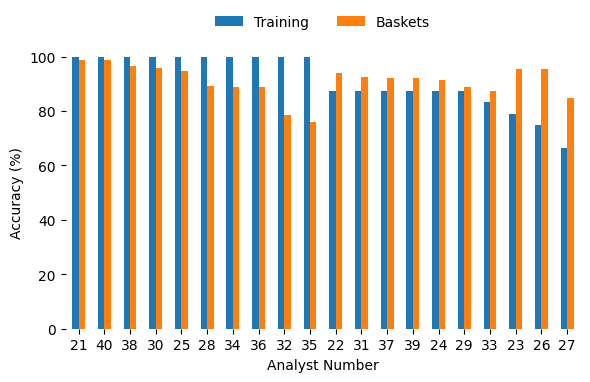

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the DataFrame
analyst_performance = pd.DataFrame({
    'analyst_numbers': training['analyst_id'],
    'training_accuracy': training['accuracy'],
    'baskets_accuracy': basket['accuracy']
})


# Sort and rename for cleaner legend labels
# analyst_performance = analyst_performance.sort_values(by='training_accuracy', ascending=False)
analyst_performance = analyst_performance.sort_values(by=['training_accuracy', 'baskets_accuracy'], ascending=[False, False])
analyst_performance = analyst_performance.rename(columns={

    'training_accuracy': 'Training',
    'baskets_accuracy': 'Baskets',
})

# Plot with muted red and blue, and smaller width
ax = analyst_performance.plot(
    x='analyst_numbers',
    kind='bar',
    figsize=(6, 4),  # Less wide
    # color=['#d95f02', '#1b9e77']  # Muted red and blue
)

# Axis labels and y-axis limit
plt.xlabel('Analyst Number')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)

# Legend styling: top center, no border
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.2),  # Move higher to avoid overlapping bars
    ncol=2,
    frameon=False
)

# Remove plot bounding box (spines)
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Tight layout for nice spacing
plt.tight_layout()

# export as PNG
plt.savefig("../data/analyst_accuracy_chart.png", dpi=300, bbox_inches='tight')


# Show the final plot
plt.show()


# download the png
# from google.colab import files
# files.download('../data/analyst_accuracy_chart.png')

@mlieberm@nd.edu The bar chart looks correct when I compare it to the previous one. Note that if the analyst identified paracetamol as paracetamol starch, I  considered it correct.

In case you want to see how I generated it, see https://colab.research.google.com/drive/1S9yIlkY-reBSMOh4owSOpj7WyOG8rVgR#scrollTo=2kKkstCwEzWv

## Generating the new Figure 3. "Analysts Results for Interpreting Paracetamol and Penicillin Procaine."


In [30]:
MSHTanzaniaReads.columns

Index(['id', 'Analyst', 'analyst_id', 'Sample ID', 'Labelled As',
       'Actual Identity', 'Identified As', 'Suspicious Because of Lanes',
       'Starch Present?', 'PAD #', 'Date Analyzed', 'Comments'],
      dtype='object')

In [31]:
MSHTanzaniaReads

,id,Analyst,analyst_id,Sample ID,Labelled As,Actual Identity,Identified As,Suspicious Because of Lanes,Starch Present?,PAD #,Date Analyzed,Comments
0,12309,1.0,28,T28-6I29,amoxicillin,amoxicillin,amoxicillin,NaN,NaN,35197,7/9/2018,NaN
1,12256,2.0,28,T28-KYE2,amoxicillin,amoxicillin,amoxicillin,NaN,NaN,35266,7/9/2018,NaN
2,12275,3.0,28,T28-NNJQ,amoxicillin,amoxicillin,amoxicillin,NaN,NaN,35267,7/9/2018,NaN
3,12243,4.0,28,T28-DUWC,amoxicillin,amoxicillin,amoxicillin,NaN,NaN,35196,7/9/2018,NaN
4,12333,5.0,28,T28-SU2V,amoxicillin,amoxicillin,amoxicillin,NaN,NaN,35272,7/9/2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3033,10352,146.0,38,T38-4CRK,quinine,vitamin-c,suspicious,D,NaN,30309,25/9/2018,NaN
3034,10365,147.0,38,T38-TGRV,quinine,vitamin-c,suspicious,D,NaN,35486,15/8/2018,Probably ascorbic acid
3035,10284,148.0,38,T38-6P2X,quinine,vitamin-c,suspicious,D,NaN,34564,4/9/2018,NaN
3036,10277,149.0,38,T38-GOU4,quinine,vitamin-c,suspicious,D,NaN,34569,4/9/2018,NaN


In [32]:
import pandas as pd


def analyze_drug_by_analyst(df, drug_name, analyst_id):
    """
    Analyzes the prediction accuracy for a specific drug and analyst.
    """
    analyst_df = df[(df['analyst_id'] == analyst_id) & (df['Labelled As'] == drug_name)]

    #good samples analysis
    good_samples = analyst_df[(analyst_df['Labelled As'] == drug_name) & (analyst_df['Labelled As'] == analyst_df['Actual Identity'])]
    good_correct_predictions = good_samples[good_samples['Identified As'] == drug_name].shape[0]
    total_good = len(good_samples)

    #bad samples analysis
    bad_samples = analyst_df[(analyst_df['Labelled As'] == drug_name) & (analyst_df['Labelled As'] != analyst_df['Actual Identity'])]
    #bad_correct_predictions = bad_samples[bad_samples['Identified As'] == drug_name].shape[0]
    #bad_correct_predictions = bad_samples[(bad_samples['Identified As'] == 'suspicious') | (bad_samples['Identified As'] == bad_samples['Actual Identity'])].shape[0] # == > 'suspicious'
    bad_correct_predictions = bad_samples[bad_samples['Identified As'] != bad_samples['Labelled As'] ].shape[0]
    #bad_correct_predictions = bad_samples[(bad_samples['Identified As'] == 'suspicious')].shape[0]
    total_bad = len(bad_samples)

    good_accuracy = good_correct_predictions / total_good * 100 if total_good > 0 else 0
    bad_accuracy = bad_correct_predictions / total_bad * 100 if total_bad > 0 else 0
    total_accuracy = (good_correct_predictions + bad_correct_predictions) / (total_good + total_bad) * 100 if (total_good + total_bad) > 0 else 0

    results = {
        'analyst_id': analyst_id,
        'drug': drug_name,
        'good_identified': good_correct_predictions,
        'good_total': total_good,
        'specificity': good_accuracy,
        'bad_identified': bad_correct_predictions,
        'bad_total': total_bad,
        'sensitivity': bad_accuracy,
        'total_identifications': good_correct_predictions + bad_correct_predictions,
        'total_samples': total_good + total_bad,
        'accuracy': total_accuracy
    }

    return results

# Initialize an empty list to store results
new_basket_data = []

# Iterate through each unique analyst
for analyst in MSHTanzaniaReads['analyst_id'].unique():
    # Analyze paracetamol for the current analyst
    paracetamol_results = analyze_drug_by_analyst(MSHTanzaniaReads, 'paracetamol', analyst)
    new_basket_data.append(paracetamol_results)

    # Analyze penicillin-procaine for the current analyst
    penicillin_results = analyze_drug_by_analyst(MSHTanzaniaReads, 'penicillin-procaine', analyst)
    new_basket_data.append(penicillin_results)

# remove the row where analyst_id is NaN
new_basket_data = [item for item in new_basket_data if pd.notna(item['analyst_id'])]

# Create a new DataFrame from the collected results
new_basket = pd.DataFrame(new_basket_data)
new_basket


,analyst_id,drug,good_identified,good_total,specificity,bad_identified,bad_total,sensitivity,total_identifications,total_samples,accuracy
0,28,paracetamol,16,16,100.000000,13,14,92.857143,29,30,96.666667
1,28,penicillin-procaine,14,15,93.333333,15,15,100.000000,29,30,96.666667
2,29,paracetamol,16,17,94.117647,9,13,69.230769,25,30,83.333333
3,29,penicillin-procaine,14,16,87.500000,14,14,100.000000,28,30,93.333333
4,24,paracetamol,16,16,100.000000,10,14,71.428571,26,30,86.666667
5,24,penicillin-procaine,15,15,100.000000,14,15,93.333333,29,30,96.666667
6,23,paracetamol,18,18,100.000000,3,12,25.000000,21,30,70.000000
7,23,penicillin-procaine,14,15,93.333333,14,15,93.333333,28,30,93.333333
8,36,paracetamol,13,16,81.250000,14,14,100.000000,27,30,90.000000
9,36,penicillin-procaine,15,15,100.000000,15,15,100.000000,30,30,100.000000


In [33]:
# Create the DataFrame
new_basket_df = pd.DataFrame()

# Iterate over unique analyst IDs
for analyst_id in new_basket['analyst_id'].unique():
    analyst_data = new_basket[new_basket['analyst_id'] == analyst_id]

    # Initialize an empty dictionary for the current analyst
    analyst_row = {'analyst_id': analyst_id}

    # Iterate over the drugs and calculate sensitivity and specificity
    for drug in ['paracetamol', 'penicillin-procaine']:
      drug_data = analyst_data[analyst_data["drug"] == drug]
      if not drug_data.empty:
          analyst_row[f'{drug}_sensitivity'] = drug_data['sensitivity'].iloc[0]
          analyst_row[f'{drug}_specificity'] = drug_data['specificity'].iloc[0]

    # Append the analyst's data to the DataFrame
    new_basket_df = pd.concat([new_basket_df, pd.DataFrame([analyst_row])], ignore_index=True)


# Display the DataFrame
new_basket_df


,analyst_id,paracetamol_sensitivity,paracetamol_specificity,penicillin-procaine_sensitivity,penicillin-procaine_specificity
0,28,92.857143,100.000000,100.000000,93.333333
1,29,69.230769,94.117647,100.000000,87.500000
2,24,71.428571,100.000000,93.333333,100.000000
3,23,25.000000,100.000000,93.333333,93.333333
4,36,100.000000,81.250000,100.000000,100.000000
5,31,100.000000,100.000000,100.000000,80.000000
6,40,85.714286,100.000000,100.000000,0.000000
7,30,80.000000,80.000000,100.000000,64.705882
8,37,46.666667,73.333333,100.000000,66.666667
9,22,85.714286,93.750000,100.000000,86.666667


In [34]:
# Create a dataframe for sensitivity
sensitivity_df = new_basket_df[['analyst_id', 'paracetamol_sensitivity', 'penicillin-procaine_sensitivity']].copy()

# Sort the sensitivity dataframe by paracetamol sensitivity
sensitivity_df = sensitivity_df.sort_values(by='paracetamol_sensitivity', ascending=False)

# Create a dataframe for specificity
specificity_df = new_basket_df[['analyst_id', 'paracetamol_specificity', 'penicillin-procaine_specificity']].copy()

# Sort the specificity dataframe by paracetamol specificity
specificity_df = specificity_df.sort_values(by='paracetamol_specificity', ascending=False)


In [35]:
sensitivity_df

,analyst_id,paracetamol_sensitivity,penicillin-procaine_sensitivity
4,36,100.000000,100.000000
5,31,100.000000,100.000000
0,28,92.857143,100.000000
12,32,92.857143,100.000000
19,38,92.857143,100.000000
17,34,86.666667,100.000000
6,40,85.714286,100.000000
9,22,85.714286,100.000000
7,30,80.000000,100.000000
2,24,71.428571,93.333333


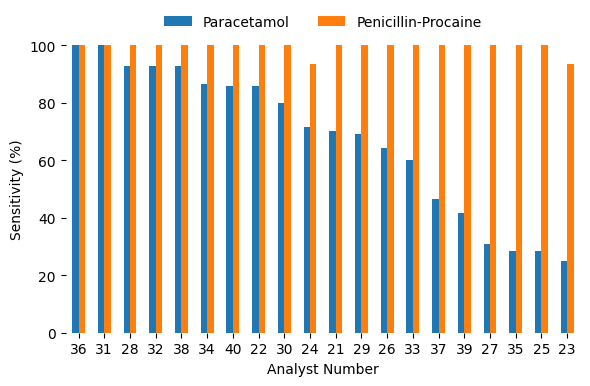

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort the DataFrame by paracetamol_sensitivity for cleaner visualization
sensitivity_df = sensitivity_df.sort_values(by=['paracetamol_sensitivity',
                                                'penicillin-procaine_sensitivity'],
                                            ascending=[False, False])


# Rename columns for better legend labels
sensitivity_df = sensitivity_df.rename(columns={
    'paracetamol_sensitivity': 'Paracetamol',
    'penicillin-procaine_sensitivity': 'Penicillin-Procaine',
})

# Create the bar chart
ax = sensitivity_df.plot(
    x='analyst_id',
    kind='bar',
    figsize=(6, 4),
    # color=['#d95f02', '#1b9e77']  # Muted red and blue (optional)
)

# Customize the plot
plt.xlabel('Analyst Number')
plt.ylabel('Sensitivity (%)')
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.xticks(rotation=0)  # Rotate x-axis labels for readability (optional)

# Legend styling
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),  # Adjust position to avoid overlap
    ncol=2,
    frameon=False
)

# Remove plot bounding box
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Tight layout
plt.tight_layout()


# export as PNG
plt.savefig("../data/sensitivity_chart.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# download the png
# from google.colab import files
# files.download('../data/sensitivity_chart.png')

In [37]:
specificity_df

,analyst_id,paracetamol_specificity,penicillin-procaine_specificity
0,28,100.000000,93.333333
6,40,100.000000,0.000000
18,39,100.000000,73.333333
15,26,100.000000,26.666667
13,27,100.000000,53.333333
10,25,100.000000,100.000000
5,31,100.000000,80.000000
3,23,100.000000,93.333333
2,24,100.000000,100.000000
1,29,94.117647,87.500000


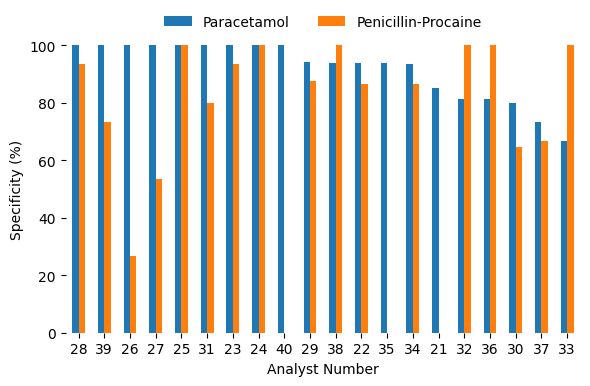

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort the DataFrame by paracetamol_specificity for cleaner visualization
specificity_df = specificity_df.sort_values(by='paracetamol_specificity', ascending=False)

# Rename columns for better legend labels
specificity_df = specificity_df.rename(columns={
    'paracetamol_specificity': 'Paracetamol',
    'penicillin-procaine_specificity': 'Penicillin-Procaine',
})

# Create the bar chart
ax = specificity_df.plot(
    x='analyst_id',
    kind='bar',
    figsize=(6, 4),
    # color=['#d95f02', '#1b9e77']  # Muted red and blue (optional)
)

# Customize the plot
plt.xlabel('Analyst Number')
plt.ylabel('Specificity (%)')
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.xticks(rotation=0)  # Rotate x-axis labels for readability (optional)

# Legend styling
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),  # Adjust position to avoid overlap
    ncol=2,
    frameon=False
)

# Remove plot bounding box
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Tight layout
plt.tight_layout()


# export as PNG
plt.savefig("../data/specificity_chart.png", dpi=300, bbox_inches='tight')


# Display the plot
plt.show()

# download the png
# from google.colab import files
# files.download('../data/specificity_chart.png')

## Paper
[MSH Tanazania MSS_v4 Google Docs](https://docs.google.com/document/d/1FlhvaZFzkXZTIClA03x3xadudm3sTHei9gVRyOj6qz4/edit?tab=t.0)

## Other linlks

Drive with original data used in this notebook
https://drive.google.com/drive/folders/0ACcr4dCeZ_cWUk9PVA


https://docs.google.com/spreadsheets/d/1ybv0_2-DGe23TI2_Osu8pDMd50cFvwwR/edit?gid=1800463683#gid=1800463683


https://github.com/PaperAnalyticalDeviceND/FHI360_Lite/wiki/MHS%E2%80%90Tanzania-Data

https://docs.google.com/spreadsheets/d/1wxbYqlrIaK1wB358kVbnpN54BPjVuwdNvKaURdQ15Zg/edit?usp=sharing

